<a href="https://colab.research.google.com/github/jmrenovado/Alura_Store_Latam/blob/main/AluraStoreLatam%20(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importación de datos



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import folium

url =  "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()


,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


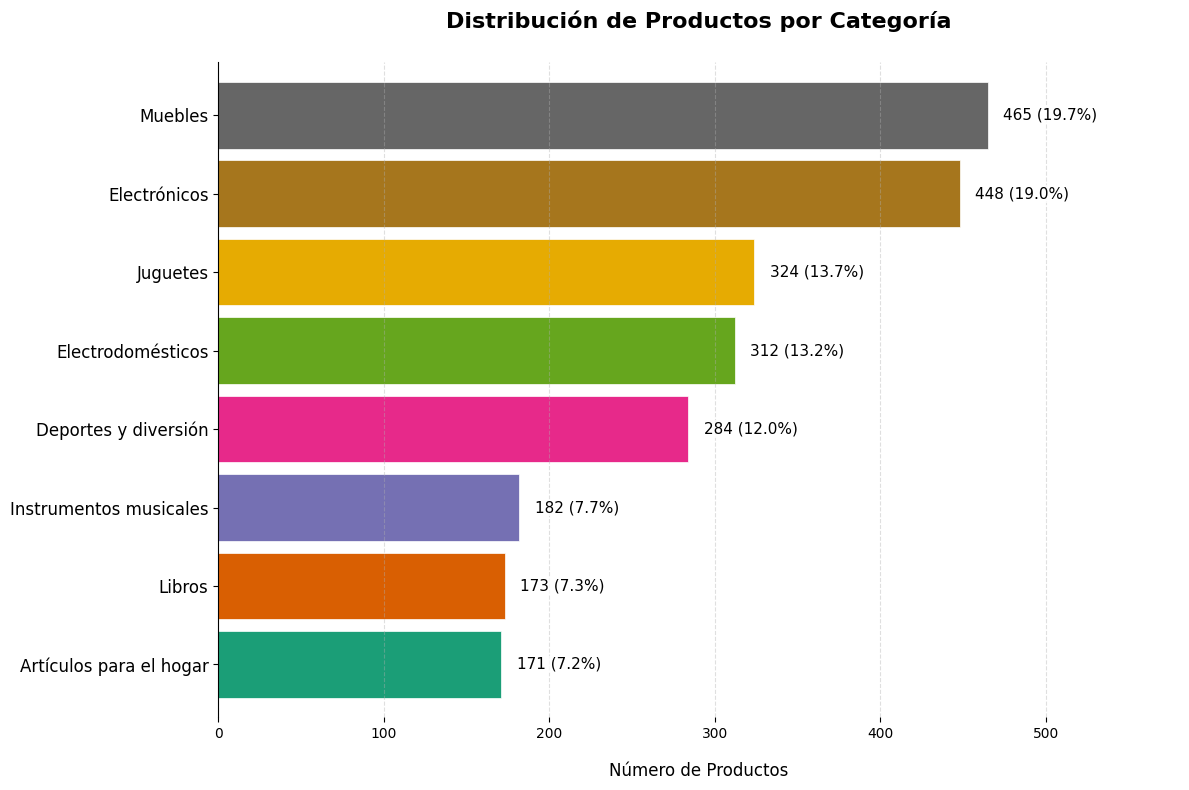

In [ ]:
def plot_categories_distribution(df, category_col='Categoría del Producto'):
    """
    Crea un gráfico de barras horizontales mostrando distribución y porcentaje por categoría.

    Args:
        df: DataFrame con los datos
        category_col: Columna con las categorías (default: 'Categoría del Producto')
    """
    # Preparar datos
    category_counts = df.groupby(category_col).size().sort_values()
    total = category_counts.sum()
    percentages = (category_counts / total) * 100

    # Crear figura
    plt.figure(figsize=(12, 8))

    # Gráfico con mejor estética
    ax = category_counts.plot(
        kind='barh',
        color=sns.color_palette('Dark2', len(category_counts)),
        edgecolor='white',
        linewidth=0.5,
        width=0.85  # Controla el grosor de las barras
    )

    # Personalizar apariencia
    ax.set_title('Distribución de Productos por Categoría', pad=25, fontsize=16, fontweight='bold')
    ax.set_xlabel('Número de Productos', labelpad=15, fontsize=12)
    ax.set_ylabel('')
    ax.tick_params(axis='y', labelsize=12)

    # Remover bordes y grid
    for spine in ['top', 'right', 'bottom']:
        ax.spines[spine].set_visible(False)

    # Añadir etiquetas con conteo y porcentaje
    for i, (value, pct) in enumerate(zip(category_counts, percentages)):
        ax.text(value + (0.02*max(category_counts)), i,
                f'{value:,} ({pct:.1f}%)',
                va='center',
                fontsize=11,
                bbox=dict(facecolor='white', alpha=0.8, edgecolor='none', pad=1))


    # Ajustar layout
    plt.xlim(0, max(category_counts)*1.25)
    plt.grid(axis='x', linestyle='--', alpha=0.4)
    plt.tight_layout()
    plt.show()

# Ejemplo de uso
plot_categories_distribution(tienda)

#1. Análisis de facturación



In [ ]:
def analizar_precios_validos(tiendas, nombres_tiendas):
    """
    Analiza y muestra los precios válidos (mayores a 0) por tienda,
    incluyendo suma total, cantidad de productos y porcentaje del total general.

    Args:
        tiendas: Lista de DataFrames de cada tienda
        nombres_tiendas: Lista de nombres de las tiendas
    """
    resultados = []

    # Procesamiento de datos
    for df, nombre in zip(tiendas, nombres_tiendas):
        precios_validos = df[df['Precio'] > 0]['Precio']
        suma = precios_validos.sum()
        cantidad = len(precios_validos)
        resultados.append((nombre, suma, cantidad))

    total_general = sum(suma for _, suma, _ in resultados)

    # Visualización de resultados
    print("\n" + "="*60)
    print("ANÁLISIS DE PRECIOS VÁLIDOS POR TIENDA".center(60))
    print("="*60)

    for nombre, suma, cantidad in resultados:
        pct = (suma / total_general) * 100
        print(f"\n• {nombre.upper()}:")
        print(f"  - Suma total: ${suma:,.0f}")
        print(f"  - Productos válidos: {cantidad}")
        print(f"  - Porcentaje del total: {pct:.1f}%")

    print("\n" + "-"*60)
    print(f"TOTAL GENERAL: ${total_general:,.0f}")
    print("="*60)

# Datos de ejemplo
tiendas = [tienda, tienda2, tienda3, tienda4]
nombres_tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']

# Ejecutar análisis
analizar_precios_validos(tiendas, nombres_tiendas)


           ANÁLISIS DE PRECIOS VÁLIDOS POR TIENDA           

• TIENDA 1:
  - Suma total: $1,150,880,400
  - Productos válidos: 2359
  - Porcentaje del total: 26.1%

• TIENDA 2:
  - Suma total: $1,116,343,500
  - Productos válidos: 2359
  - Porcentaje del total: 25.4%

• TIENDA 3:
  - Suma total: $1,098,019,600
  - Productos válidos: 2359
  - Porcentaje del total: 24.9%

• TIENDA 4:
  - Suma total: $1,038,375,700
  - Productos válidos: 2358
  - Porcentaje del total: 23.6%

------------------------------------------------------------
TOTAL GENERAL: $4,403,619,200


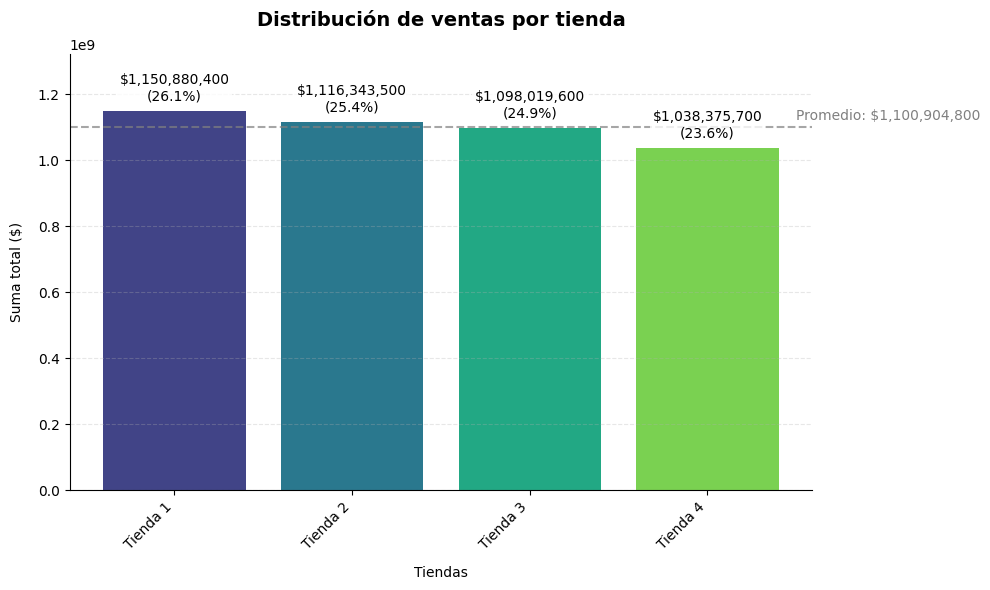

In [ ]:
def plot_suma_precios_tiendas(totals, nombres_tiendas):
    """
    Crea un gráfico de barras con la suma de precios por tienda mostrando porcentajes.

    Args:
        totals: Lista con los totales por tienda
        nombres_tiendas: Lista de nombres de las tiendas
    """
    # Cálculo de porcentajes
    total_sum = sum(totals)
    porcentajes = [(total / total_sum) * 100 for total in totals]

    # Configuración del gráfico
    plt.figure(figsize=(10, 6))
    ax = plt.subplot()

    # Crear barras con paleta de colores
    bars = ax.bar(nombres_tiendas, totals, color=sns.color_palette("viridis", len(totals)))

    # Personalización del gráfico
    ax.set_title("Distribución de ventas por tienda", pad=20, fontsize=14, fontweight='bold')
    ax.set_xlabel("Tiendas", labelpad=10)
    ax.set_ylabel("Suma total ($)", labelpad=10)

    # Quitar bordes innecesarios
    for spine in ['top', 'right']:
        ax.spines[spine].set_visible(False)

    # Añadir etiquetas con valores y porcentajes
    for bar, total, porcentaje in zip(bars, totals, porcentajes):
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, height + max(totals)*0.02,
                f'${total:,.0f}\n({porcentaje:.1f}%)',
                ha='center', va='bottom',
                fontsize=10,
                bbox=dict(facecolor='white', alpha=0.8, edgecolor='none', pad=2))

    # Añadir línea del promedio
    promedio = total_sum / len(totals)
    ax.axhline(y=promedio, color='gray', linestyle='--', alpha=0.7)
    ax.text(len(totals)-0.5, promedio + max(totals)*0.02,
            f'Promedio: ${promedio:,.0f}',
            color='gray')

    # Ajustar límites y rotación
    plt.xticks(rotation=45, ha='right')
    plt.ylim(0, max(totals) * 1.15)
    plt.grid(axis='y', linestyle='--', alpha=0.3)
    plt.tight_layout()
    plt.show()

# Ejemplo de uso
totals = [1150880400, 1116343500, 1098019600, 1038375700]
nombres_tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']
plot_suma_precios_tiendas(totals, nombres_tiendas)

# 2. Ventas por categoría

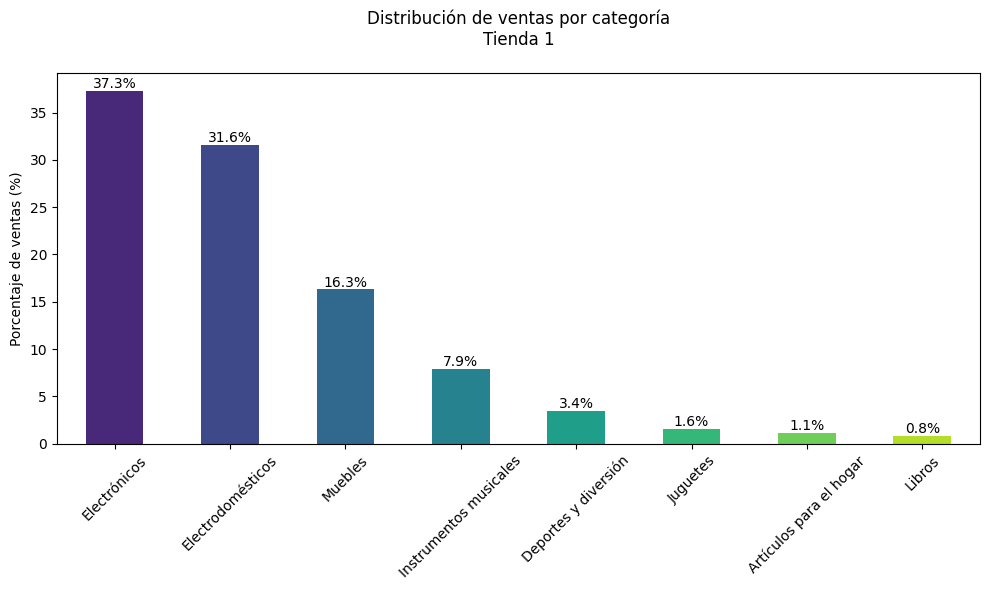

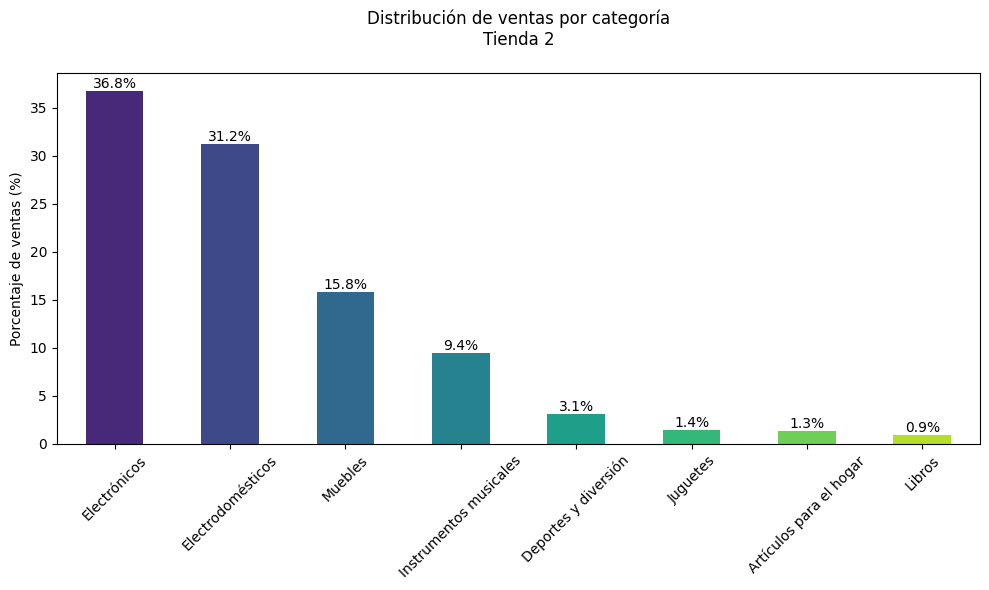

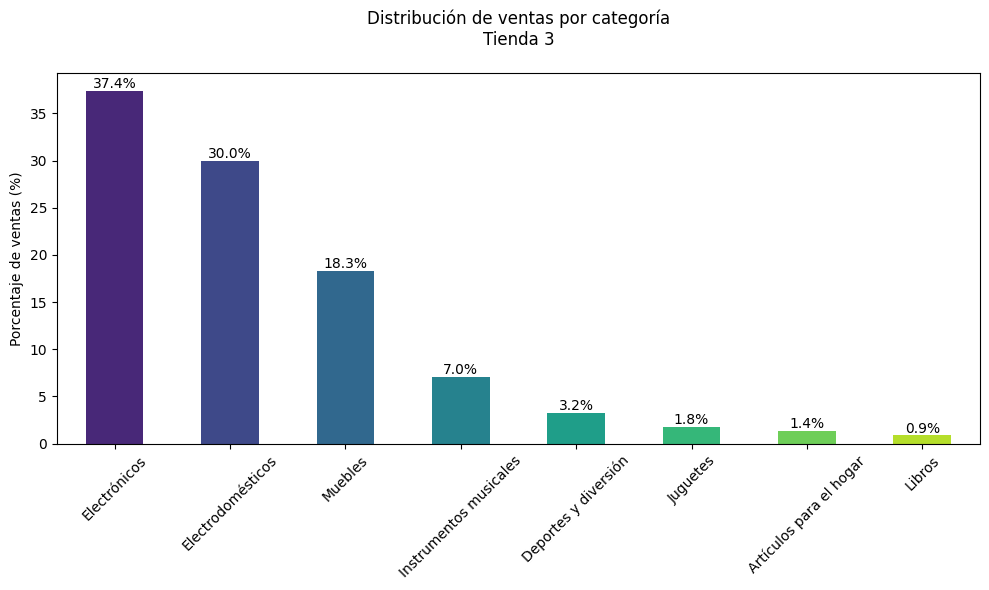

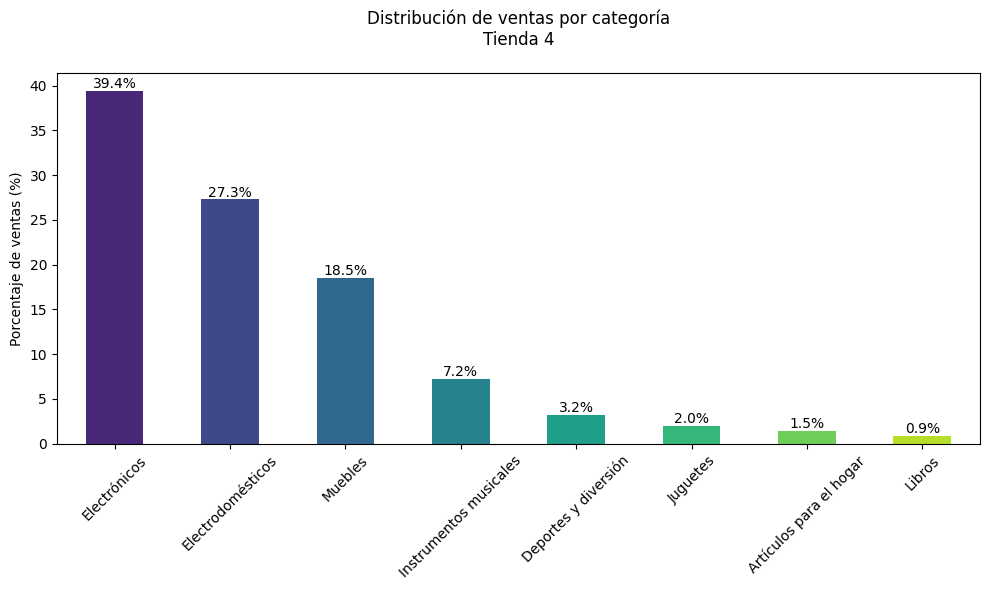

In [ ]:
def plot_ventas_porcentaje(df, tienda_nombre, col_categoria='Categoría del Producto', col_precio='Precio'):
    """
    Muestra un gráfico de barras con el porcentaje de ventas por categoría

    Args:
        df: DataFrame con los datos de ventas
        tienda_nombre: Nombre de la tienda para el título
        col_categoria: Nombre de la columna de categorías (opcional)
        col_precio: Nombre de la columna de precios (opcional)
    """
    # Cálculos simplificados
    ventas_categoria = df.groupby(col_categoria)[col_precio].sum()
    porcentajes = ventas_categoria / ventas_categoria.sum() * 100

    # Configuración del gráfico
    plt.figure(figsize=(10, 6))
    ax = porcentajes.sort_values(ascending=False).plot(
        kind='bar',
        color=sns.color_palette("viridis", len(porcentajes)),
        rot=45
    )

    # Títulos y etiquetas
    ax.set_title(f'Distribución de ventas por categoría\n{tienda_nombre}', pad=20)
    ax.set_xlabel('')
    ax.set_ylabel('Porcentaje de ventas (%)')

    # Añadir etiquetas de porcentaje
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.1f}%',
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=(0, 5),
                   textcoords='offset points')

    plt.tight_layout()
    plt.show()

# Uso con listas para evitar repetición
tiendas = [
    (tienda, 'Tienda 1'),
    (tienda2, 'Tienda 2'),
    (tienda3, 'Tienda 3'),
    (tienda4, 'Tienda 4')
]

for df_tienda, nombre in tiendas:
    plot_ventas_porcentaje(df_tienda, nombre)

# 3. Calificación promedio de la tienda


In [ ]:
# Calcula el promedio de calificación para cada tienda
tienda_nombre = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']
promedios_calificacion = []
for i, df in enumerate([tienda, tienda2, tienda3, tienda4]):
    promedio = df['Calificación'].mean()
    promedios_calificacion.append(promedio)
    print(f'El promedio de calificación de {tienda_nombre[i]} es: {promedio:.2f}')

El promedio de calificación de Tienda 1 es: 3.98
El promedio de calificación de Tienda 2 es: 4.04
El promedio de calificación de Tienda 3 es: 4.05
El promedio de calificación de Tienda 4 es: 4.00


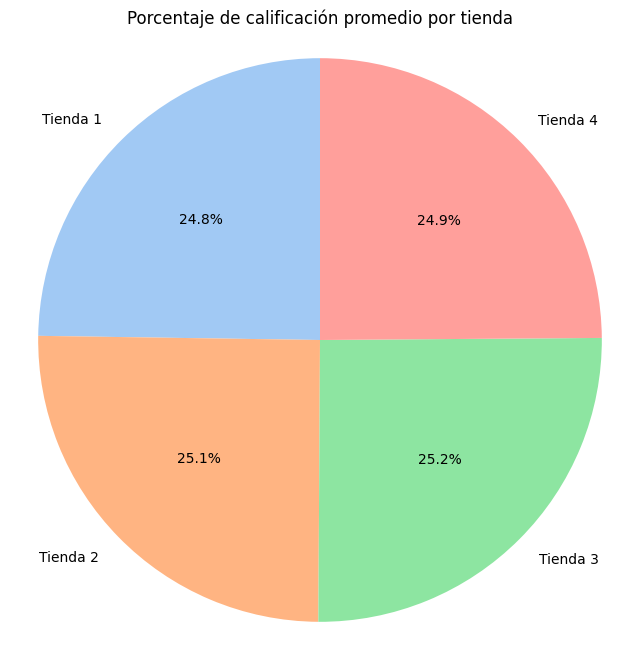

In [ ]:
# Crea un gráfico de pastel con los porcentajes de calificación promedio
plt.figure(figsize=(8, 8))
plt.pie(promedios_calificacion, labels=tienda_nombre, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("pastel"))
plt.title('Porcentaje de calificación promedio por tienda')
plt.axis('equal')  # Para que el gráfico sea un círculo
plt.show()


# 4. Productos más y menos vendidos

In [ ]:
def analyze_product_sales(df, tienda_nombre, n_products=5):
    """
    Analiza y muestra los productos más y menos vendidos con sus porcentajes de venta.

    Args:
        df: DataFrame con datos de ventas
        tienda_nombre: Nombre de la tienda
        n_products: Número de productos a mostrar (por defecto 5)
    """
    # Cálculos en una sola línea
    sales = df.groupby('Producto')['Precio'].sum().sort_values(ascending=False)
    total = sales.sum()

    # Formateo de resultados
    def format_results(products, label):
        print(f"\n{label}:")
        for product, amount in products.items():
            print(f"• {product}: ${amount:,.0f} ({amount/total:.1%})")

    # Resultados
    print(f"\n{'='*40}\n🔍 Análisis de ventas: {tienda_nombre}\n{'='*40}")
    format_results(sales.head(n_products), f"TOP {n_products} PRODUCTOS")
    format_results(sales.tail(n_products), f"PEORES {n_products} PRODUCTOS")
    print(f"\nTotal general de ventas: ${total:,.2f}\n{'='*40}")

# Procesamiento automático de todas las tiendas
[analyze_product_sales(df, name) for df, name in [
    (tienda, 'Tienda 1'),
    (tienda2, 'Tienda 2'),
    (tienda3, 'Tienda 3'),
    (tienda4, 'Tienda 4')
]]


🔍 Análisis de ventas: Tienda 1

TOP 5 PRODUCTOS:
• TV LED UHD 4K: $142,150,200 (12.4%)
• Refrigerador: $112,143,300 (9.7%)
• Iphone 15: $97,902,200 (8.5%)
• Smart TV: $67,452,100 (5.9%)
• Lavadora de ropa: $65,783,600 (5.7%)

PEORES 5 PRODUCTOS:
• Ajedrez de madera: $1,430,600 (0.1%)
• Set de vasos: $1,359,100 (0.1%)
• Cubo mágico 8x8: $696,900 (0.1%)
• Dinosaurio Rex: $688,900 (0.1%)
• Cuerda para saltar: $652,800 (0.1%)

Total general de ventas: $1,150,880,400.00

🔍 Análisis de ventas: Tienda 2

TOP 5 PRODUCTOS:
• Iphone 15: $113,225,800 (10.1%)
• TV LED UHD 4K: $103,375,000 (9.3%)
• Refrigerador: $97,632,500 (8.7%)
• Lavadora de ropa: $66,762,300 (6.0%)
• Smart TV: $61,142,000 (5.5%)

PEORES 5 PRODUCTOS:
• Set de vasos: $1,542,600 (0.1%)
• Ajedrez de madera: $1,287,700 (0.1%)
• Cuerda para saltar: $856,900 (0.1%)
• Dinosaurio Rex: $770,300 (0.1%)
• Cubo mágico 8x8: $643,600 (0.1%)

Total general de ventas: $1,116,343,500.00

🔍 Análisis de ventas: Tienda 3

TOP 5 PRODUCTOS:
• Refrig

[None, None, None, None]

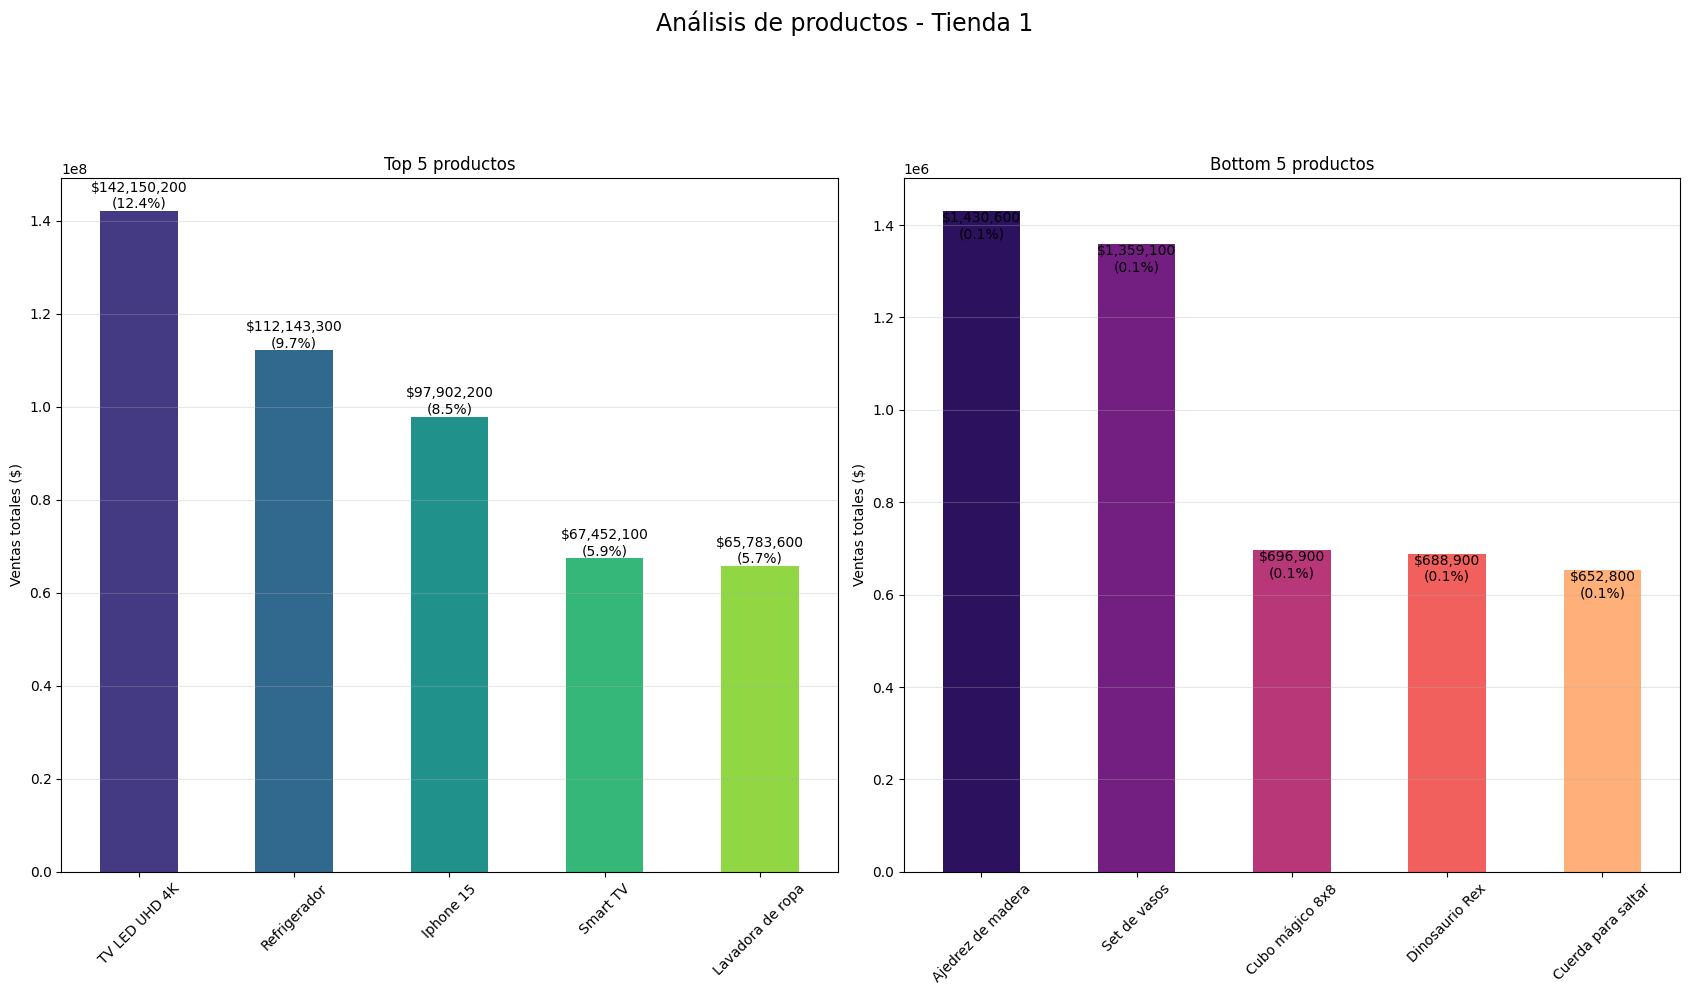

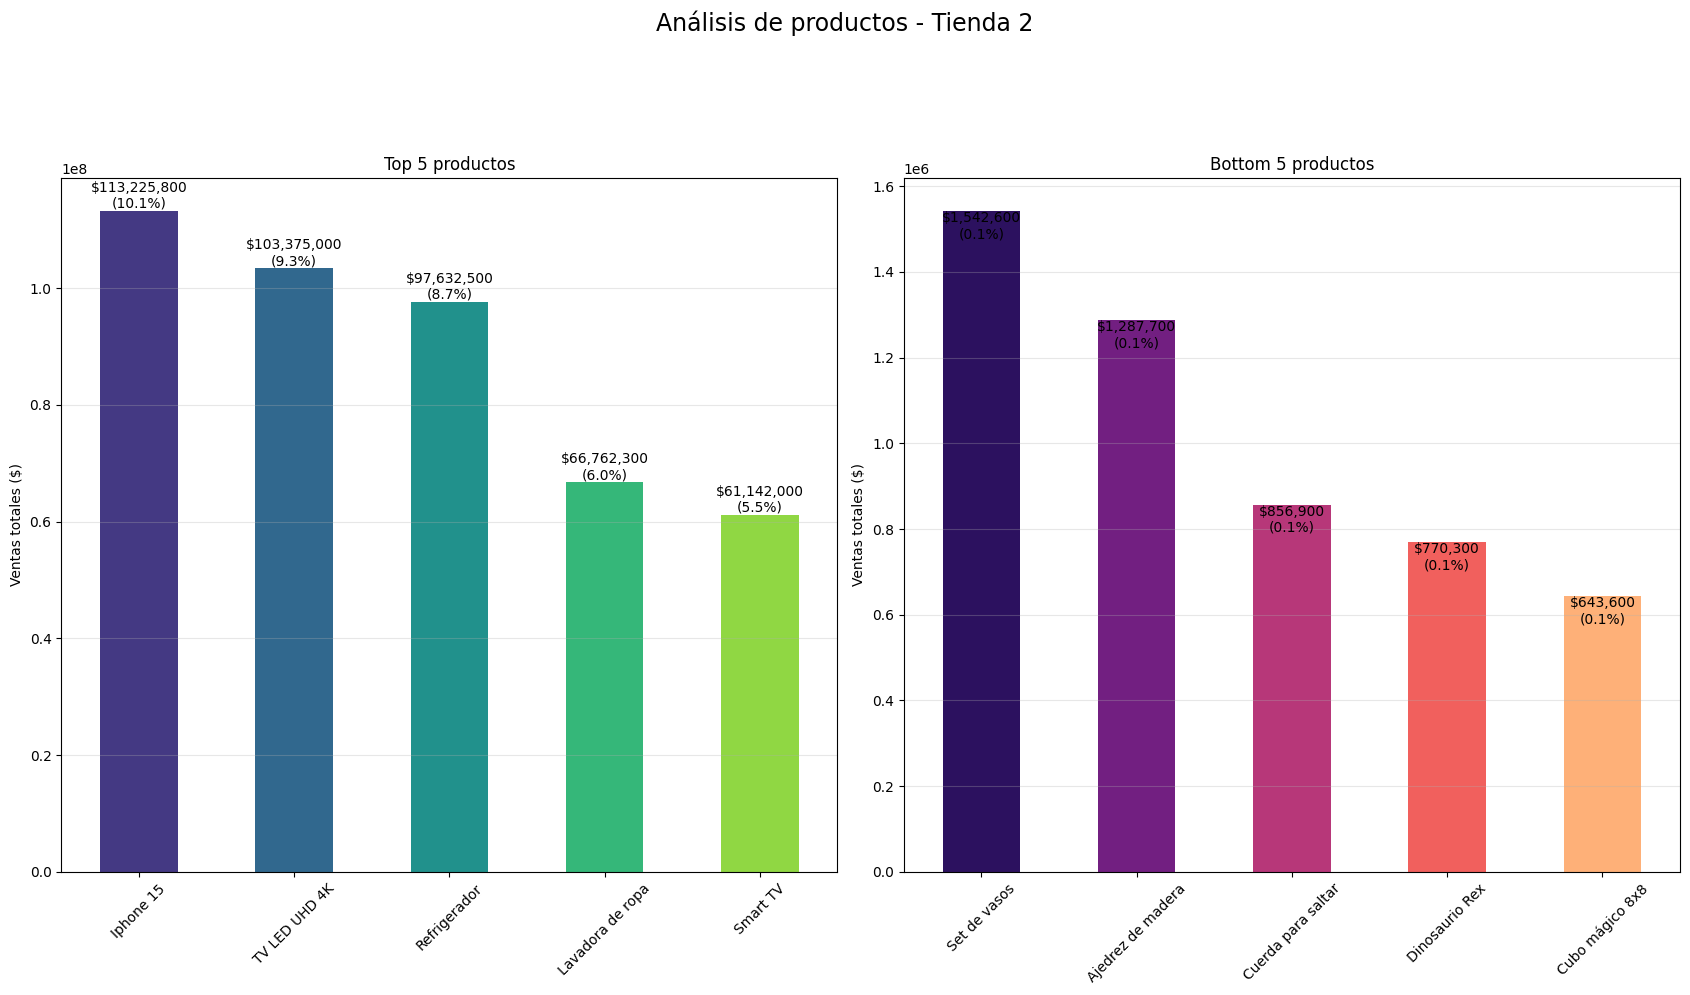

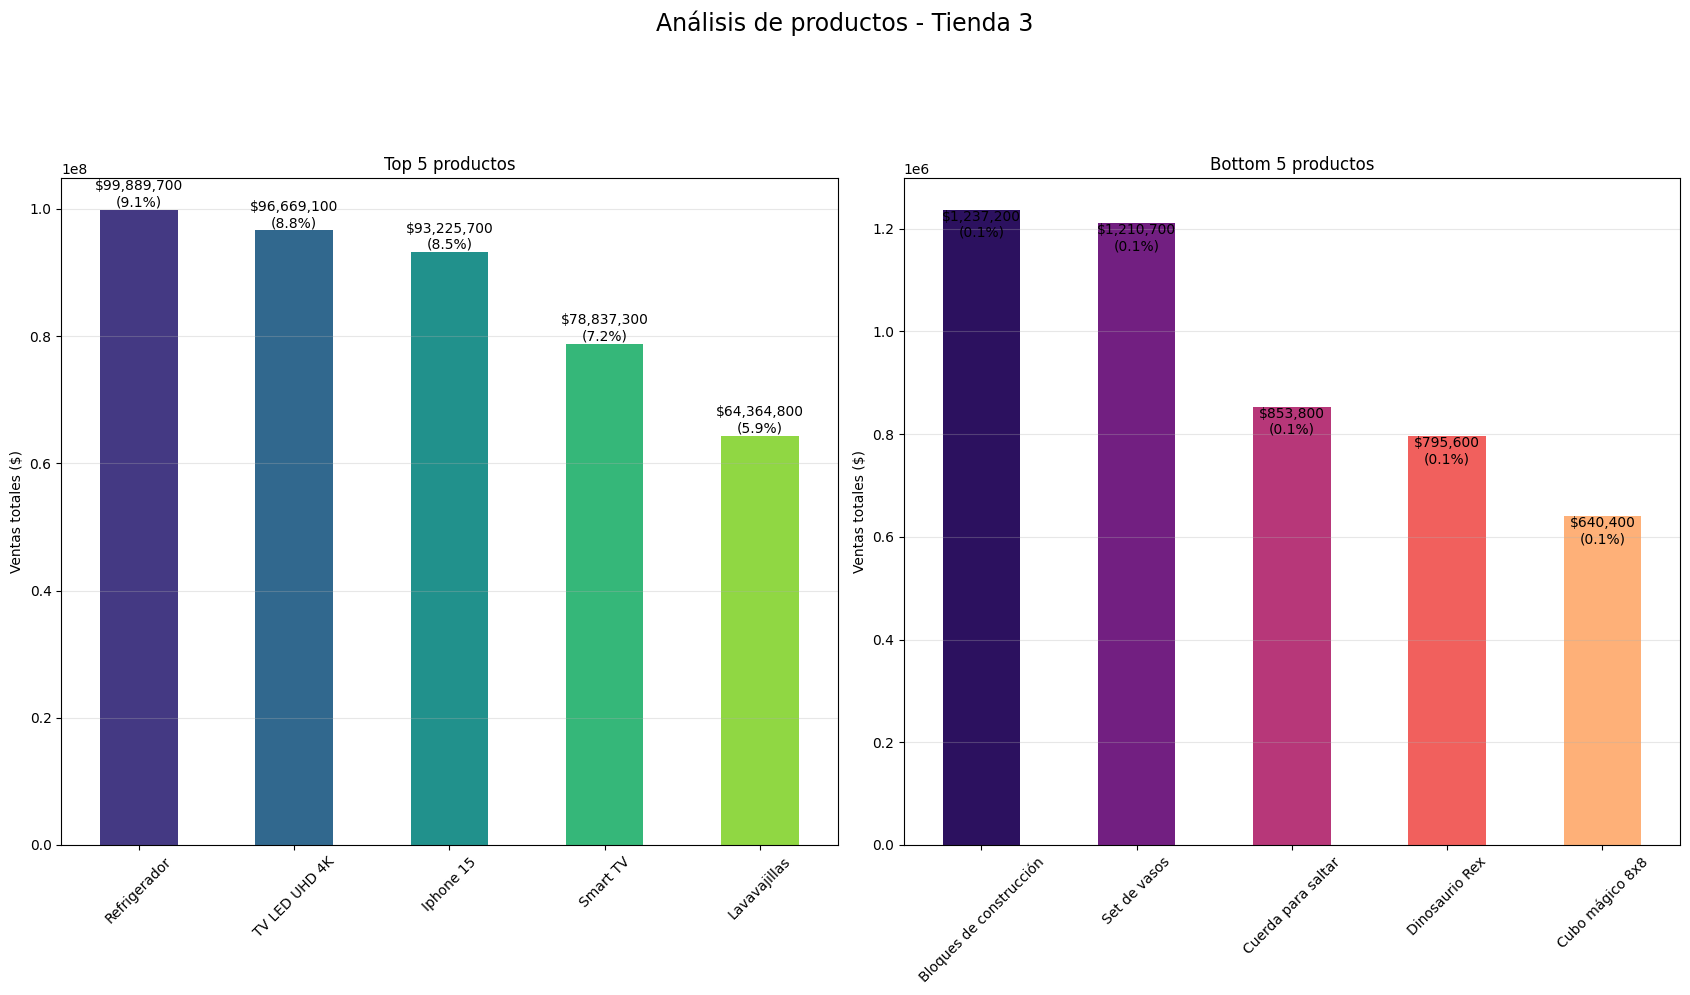

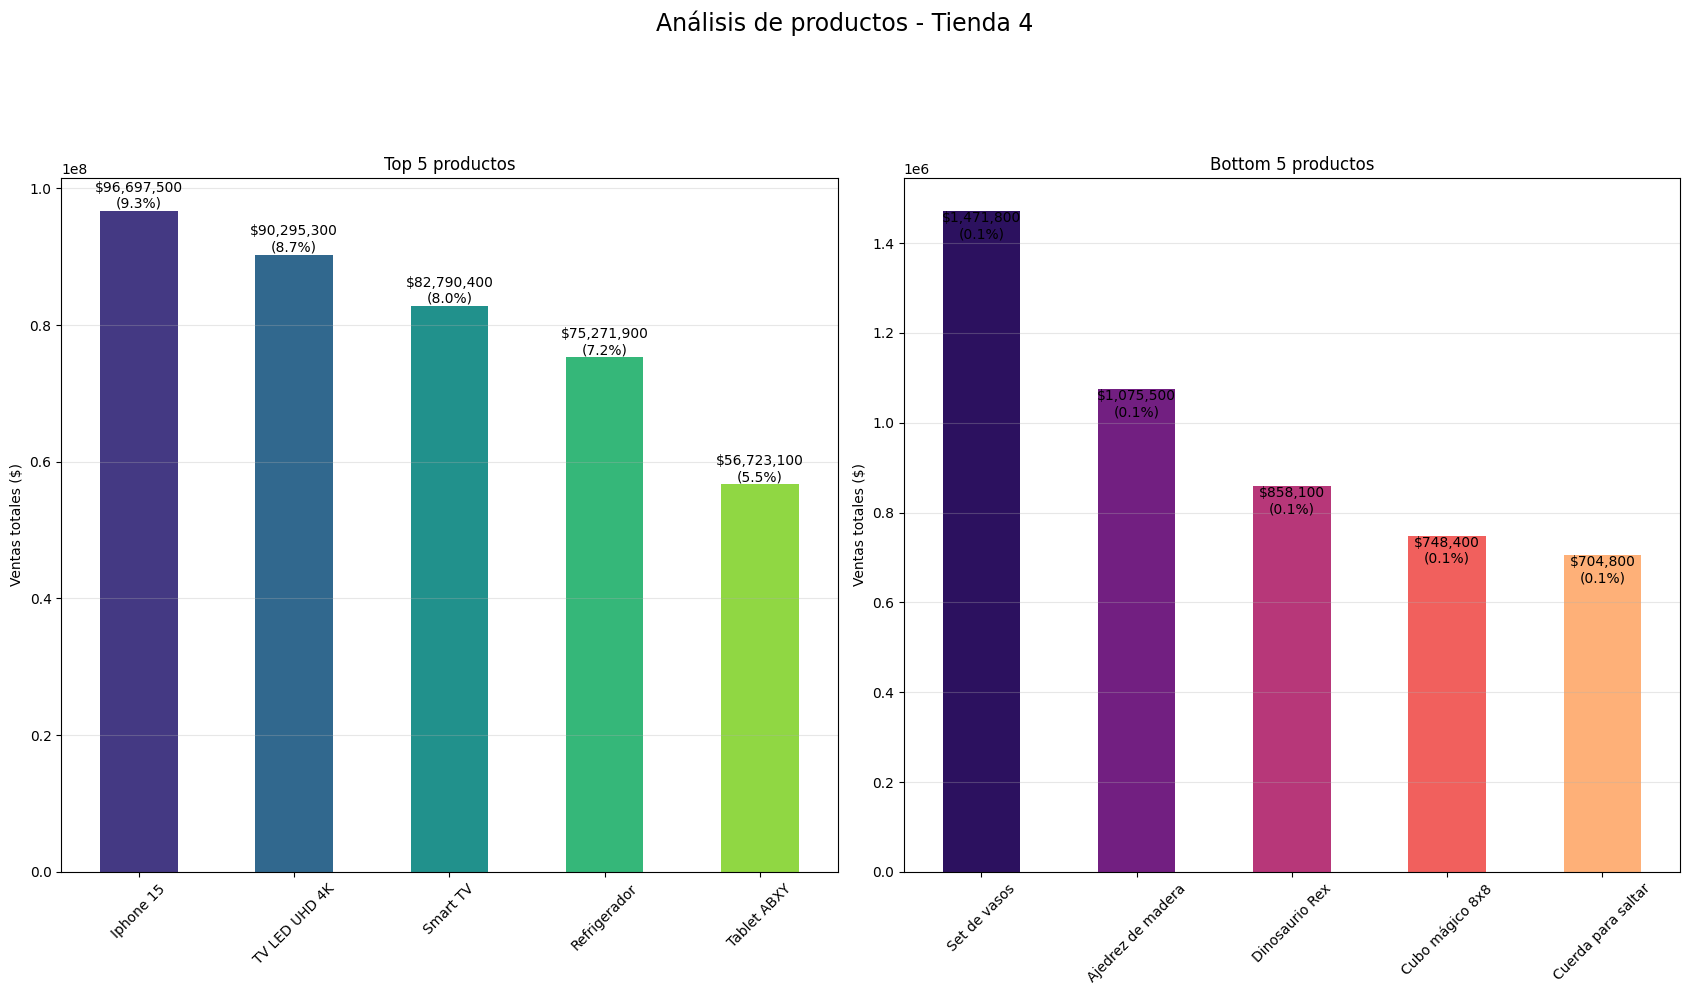

[None, None, None, None]

In [ ]:

def plot_top_bottom_products(df, tienda_nombre, n_products=5):
    """
    Genera gráficos comparativos de productos más y menos vendidos con porcentajes

    Args:
        df: DataFrame con los datos de ventas
        tienda_nombre: Nombre de la tienda
        n_products: Número de productos a mostrar (por defecto 5)
    """
    # Cálculos simplificados
    product_sales = df.groupby('Producto')['Precio'].sum().sort_values(ascending=False)
    total_sales = product_sales.sum()

    # Selección de productos
    top = product_sales.head(n_products)
    bottom = product_sales.tail(n_products)

    # Configuración del gráfico
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(17, 9))
    fig.suptitle(f'Análisis de productos - {tienda_nombre}', y=1.1, fontsize=17)

    # Gráfico de productos más vendidos
    top.plot(kind='bar', ax=ax1, color=sns.color_palette("viridis", n_products))
    ax1.set_title(f'Top {n_products} productos')
    ax1.set_xlabel('')

    # Gráfico de productos menos vendidos
    bottom.plot(kind='bar', ax=ax2, color=sns.color_palette("magma", n_products))
    ax2.set_title(f'Bottom {n_products} productos')
    ax2.set_xlabel('')

    # Añadir porcentajes y formato común
    for ax, data in [(ax1, top), (ax2, bottom)]:
        # Calcular porcentajes
        percentajes = (data / total_sales * 100).round(1)

        # Añadir etiquetas
        for i, (val, pct) in enumerate(zip(data, percentajes)):
            ax.text(i, val, f'${val:,.0f}\n({pct}%)',
                   ha='center', va='bottom',
                   fontsize=10)

        # Configuración común
        ax.set_ylabel('Ventas totales ($)')
        ax.tick_params(axis='x', rotation=45)
        ax.grid(axis='y', alpha=0.3)

    plt.tight_layout()
    plt.show()

# Uso simplificado con list comprehension
[plot_top_bottom_products(df, name) for df, name in [
    (tienda, 'Tienda 1'),
    (tienda2, 'Tienda 2'),
    (tienda3, 'Tienda 3'),
    (tienda4, 'Tienda 4')
]]

# 5. Envío promedio por tienda


       ANÁLISIS DE COSTOS PROMEDIO DE ENVÍO       
• Tienda 1: $26018.61
• Tienda 2: $25216.24
• Tienda 3: $24805.68
• Tienda 4: $23459.46


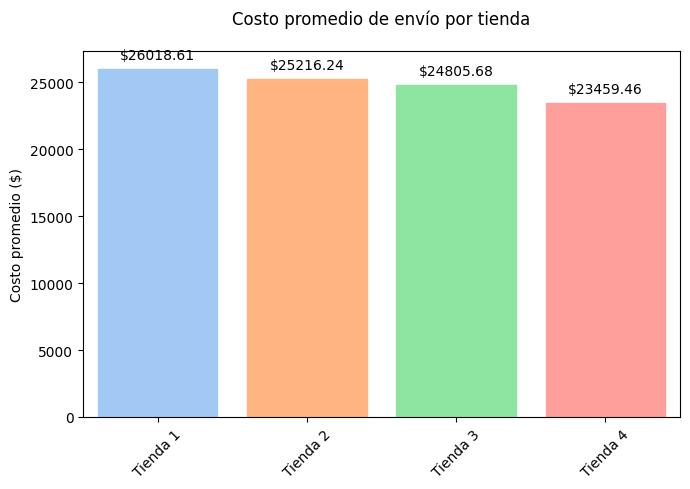

In [ ]:
def analizar_costos_envio(tiendas, nombres_tiendas, col_costo='Costo de envío'):
    """
    Analiza y visualiza los costos promedio de envío por tienda.

    Args:
        tiendas: Lista de DataFrames con datos de cada tienda
        nombres_tiendas: Lista de nombres de las tiendas
        col_costo: Nombre de la columna con costos de envío (opcional)
    """
    # Cálculo de promedios usando list comprehension
    promedios = [df[col_costo].mean() for df in tiendas]

    # Resultados en consola
    print("\n" + "="*50)
    print("ANÁLISIS DE COSTOS PROMEDIO DE ENVÍO".center(50))
    print("="*50)
    for nombre, promedio in zip(nombres_tiendas, promedios):
        print(f"• {nombre}: ${promedio:.2f}")

    # Visualización
    colors = sns.color_palette("pastel")
    plt.figure(figsize=(7, 5))
    ax = sns.barplot(x=nombres_tiendas, y=promedios)
    for i, bar in enumerate(ax.patches):
      bar.set_color(colors[i % len(colors)])
    # Personalización del gráfico
    ax.set_title("Costo promedio de envío por tienda", pad=20)
    ax.set_xlabel("")
    ax.set_ylabel("Costo promedio ($)")

    # Añadir etiquetas de valor
    for p in ax.patches:
        ax.annotate(f"${p.get_height():.2f}",
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='bottom',
                   xytext=(0, 5),
                   textcoords='offset points',
                   fontsize=10)

    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Datos de ejemplo (reemplazar con tus datos reales)
tiendas = [tienda, tienda2, tienda3, tienda4]
nombres_tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']

# Llamada a la función
analizar_costos_envio(tiendas, nombres_tiendas)

In [ ]:
# Código para identificar la tienda menos rentable
def analizar_tienda(df, nombre):
    facturacion = df[df['Precio'] > 0]['Precio'].sum()
    costo_envio_promedio = df['Costo de envío'].mean()
    calificacion_promedio = df['Calificación'].mean()
    lat = df['lat'].mean()
    lon = df['lon'].mean()

    return {
        'Tienda': nombre,
        'Facturación': facturacion,
        'Costo Envío Promedio': costo_envio_promedio,
        'Calificación Promedio': calificacion_promedio,
        'lat': lat,
        'lon': lon
    }

resultados = [
    analizar_tienda(tienda, 'Tienda 1'),
    analizar_tienda(tienda2, 'Tienda 2'),
    analizar_tienda(tienda3, 'Tienda 3'),
    analizar_tienda(tienda4, 'Tienda 4')
]

df_resultados = pd.DataFrame(resultados)
df_resultados.sort_values(by=['Facturación', 'Calificación Promedio', 'lat', 'lon'])

,Tienda,Facturación,Costo Envío Promedio,Calificación Promedio,lat,lon
3,Tienda 4,1.038376e+09,23459.457167,3.995759,5.413519,-74.774597
2,Tienda 3,1.098020e+09,24805.680373,4.048326,5.437076,-74.733463
1,Tienda 2,1.116344e+09,25216.235693,4.037304,5.499753,-74.742963
0,Tienda 1,1.150880e+09,26018.609580,3.976685,5.365283,-74.789417
